       
# House A

van Kasteren, T. L., Englebienne, G., & Kröse, B. J. (2011). Human activity recognition from wireless sensor network data: Benchmark and software. In Activity recognition in pervasive intelligent environments (pp. 165-186). Atlantis Press.

#### Feature extraction by
Juan Ye and Simon Dobson. Xlearn: learning activity labels across heterogeneous datasets. Submitted to
IEEE Transactions on Knowledge Discovery from Data

In [1]:
import scipy.io
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filename = "houseA/senseandactLabelsHouseA.mat"
mat = scipy.io.loadmat('../Dataset/House/'+filename)

print("Sensors")
for s in mat["sensor_labels"]:
    print(s[1])
    
print("Activity Labels")
for a in mat["activity_labels"]:
    print(a[0], len(a))

Sensors
['Microwave']
['Hall-Toilet door']
['Hall-Bathroom door']
['Cups cupboard']
['Fridge']
['Plates cupboard']
['Frontdoor']
['Dishwasher']
['ToiletFlush']
['Freezer']
['Pans Cupboard']
['Washingmachine']
['Groceries Cupboard']
['Hall-Bedroom door']
Activity Labels
['leave house'] 1
[] 1
['Eating'] 1
['use toilet'] 1
['take shower'] 1
['brush teeth'] 1
[] 1
[] 1
[] 1
['go to bed'] 1
[] 1
[] 1
['prepare Breakfast'] 1
[] 1
['prepare Dinner'] 1
['get snack'] 1
['get drink'] 1
['put items in dishwasher'] 1
['unload dishwasher'] 1
['store groceries'] 1
[] 1
['put clothes in washingmachine'] 1
['unload washingmachine'] 1
[] 1
['receive guest'] 1


In [3]:
filename = "houseA/sensor_data_HR_SIN_A.csv"
raw = pd.read_csv('../Dataset/House/'+filename, sep=",")
raw.head()

,AID,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13
0,3,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,1.0
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,1.0
2,1,0.0,0.0,0.5,0.0,0.0,0.0,0,0.0,0.5,0.0,0.0,0,0.0,0.0
3,4,0.2,0.0,0.0,0.0,0.4,0.4,0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1.0,0.0


In [4]:
# activityNames = [None, "lying", "sitting", "standing", "walking", "running", "cycling", "Nordic walking", None, "watching TV", "computer work", "car driving", "ascending stairs", "descending stairs", None, None, "vacuum cleaning", "ironing", "folding laundry", "house cleaning", "playing soccer", None, None, None, "rope jumping"]

In [5]:
def add_activityname(x):
#     name = "R"+str(int(x["PersonID"]))+"_"+activityNames[int(x["ActivityID"])]
#     name = activityNames[int(x["ActivityID"])]
    return "A"+str(int(x["AID"]))

raw["ActivityName"] = raw.apply(add_activityname, axis=1)
df = raw.drop('AID', 1)

In [6]:
df.to_csv("HouseA.feat", index=False)

In [7]:
raw["ActivityName"].unique()

array(['A3', 'A1', 'A4', 'A2', 'A0', 'A6', 'A5'], dtype=object)

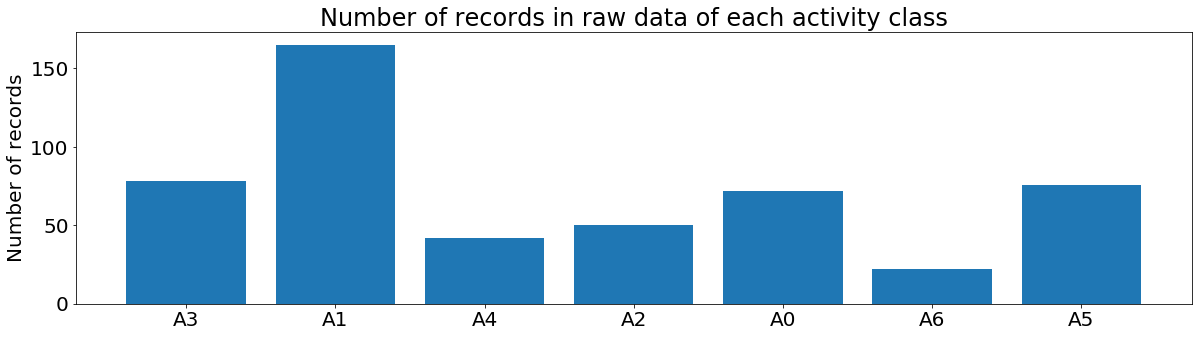

In [8]:
activity_labels = raw["ActivityName"].unique()
ind = np.arange(len(activity_labels))
plt.rcParams['figure.figsize'] = [10, 5]
nRow = []
for label in activity_labels:
    c = len(raw[raw["ActivityName"]==label])
    nRow.append(c)
    
plt.rcParams['figure.figsize'] = [20, 5]

plt.rcParams.update({'font.size': 20})
p1 = plt.bar(ind, nRow)

plt.ylabel('Number of records')
plt.title('Number of records in raw data of each activity class')
plt.xticks(ind, activity_labels)

plt.show()

['A3' 'A1' 'A4' 'A2' 'A0' 'A6' 'A5']


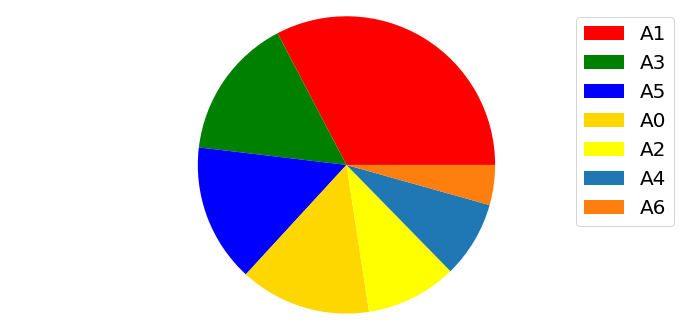

In [9]:
from functools import cmp_to_key

from matplotlib import colors as mcolors
plt.rcParams['figure.figsize'] = [10, 5]
vectors = df
colors = ["red", "green", "blue", "gold", "yellow"] + list(mcolors.TABLEAU_COLORS.values()) 

p = vectors["ActivityName"]
v = vectors[["ActivityName"]]
v["c"] = 1

labels = p.unique()
count = v.groupby(['ActivityName']).agg(['count'])[("c", "count")]
labels, count

def compare(item1, item2):
    return count[item2] - count[item1]

print(labels)
labels = sorted(labels, key=cmp_to_key(compare))
sizes = [count[l] for l in labels]

fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(sizes, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(patches, labels, loc="best")
plt.tight_layout()
plt.show()